### Length of Main Branches Statistics

In [1]:
import haccytools.mergertrees.visualization
import pickle
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from astropy.cosmology import FlatLambdaCDM
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

pyfftw not available, using numpy fft


In [31]:
forest_table = pd.read_hdf("/data/a/cpac/mbuehlmann/LJSV/forest_table.hdf5", key='table')
with open("/data/a/cpac/mbuehlmann/LJSV/progenitor_idx.pkl", "rb") as f:
    progenitor_idx = pickle.load(f)

In [32]:
n = 10
snap = 100
xaxis = 'z_nums'
rangel_bins_raw = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
last_bin = (rangel_bins_raw[-1] - rangel_bins_raw[-2])
rangel_bins = np.concatenate(([rangel_bins_raw[0] - 0.25*10**11], [(rangel_bins_raw[i] + rangel_bins_raw[i+1]) / 2 for i in np.arange(len(rangel_bins_raw) -1)], [rangel_bins_raw[-1] + (last_bin * 10)]), axis = 0)
norm_tf = True
avg_tf = True
forest_masses = np.array(forest_table['mass'])
forest_snap_nums = np.array(forest_table['snap_num'])
thresholds = [5*10**11]
thresholds_are_absolute = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

In [33]:
rangel_bins

array([7.500e+10, 1.250e+11, 1.900e+11, 2.900e+11, 4.400e+11, 6.700e+11,
       1.005e+12, 1.550e+12, 2.350e+12, 3.550e+12, 5.450e+12, 8.300e+12,
       4.400e+13])

#### 4a) Distribution of main branch lengths: binned halos

In [34]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, rangel_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
%time binned_timesteps, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times, binned_LMMs, binned_LMM_times, binned_fossil_groups = help_func.track_evol_binned(bin_halo_idx, rangel_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, thresholds, x_axis = xaxis)

CPU times: user 6min 19s, sys: 37.5 s, total: 6min 57s
Wall time: 6min 42s


/data/a/cpac/aurora/help_func.py:671: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


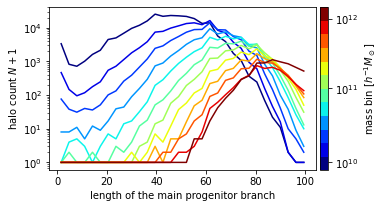

In [36]:
fig, ax = help_func.plot_main_branch_length_new(binned_main_prog_list, hist_bins = rangel_bins, log = True)

In [37]:
fig.tight_layout()
fig.savefig("main_branch_lengths.pdf", bbox_inches='tight', pad_inches=0)

<ipython-input-37-f9b8136ebf5a>:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


#### 4b) Distribution of main branch lengths: range of halos (no bins)

In [ ]:
# Find some halos
halo_idx = help_func.find_halos(forest_table, snap, mass_range = [8.3*10**12, 4.4*10**13])
# Track them
z_nums, masses, main_prog_list, major_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table)

In [ ]:
help_func.plot_main_branch_length([main_prog_list], log = False, dist_or_hist = 'dist')

#### 4c) Histogram of main branch lengths: range of halos (no bins)

In [ ]:
help_func.plot_main_branch_length([main_prog_list], log = False, dist_or_hist = 'hist', n_bins = 'auto')

#### 4d) (WIP) PDF of main branch lengths: range of halos (no bins)

In [ ]:
help_func.plot_distrib(main_prog_list, "Length of Main Branches", "Length")